In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/kaggle/input/coffee-sales/index.csv")
df

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
891,2024-06-29,2024-06-29 21:27:22.449,card,ANON-0000-0000-0009,37.72,Latte
892,2024-06-30,2024-06-30 10:28:09.842,card,ANON-0000-0000-0336,37.72,Latte
893,2024-06-30,2024-06-30 13:05:50.620,card,ANON-0000-0000-0337,23.02,Espresso
894,2024-06-30,2024-06-30 16:54:41.679,card,ANON-0000-0000-0009,37.72,Hot Chocolate


In [3]:
df["datetime"] = pd.to_datetime(df["datetime"])
df["time"] = df["datetime"].dt.time
df["date"] = pd.to_datetime(df["date"])
df["month"] = df["date"].dt.to_period("M")
df["week"] = df["date"].dt.to_period("W")
df

,date,datetime,cash_type,card,money,coffee_name,time,month,week
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte,10:15:50.520000,2024-03,2024-02-26/2024-03-03
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate,12:19:22.539000,2024-03,2024-02-26/2024-03-03
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate,12:20:18.089000,2024-03,2024-02-26/2024-03-03
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano,13:46:33.006000,2024-03,2024-02-26/2024-03-03
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte,13:48:14.626000,2024-03,2024-02-26/2024-03-03
...,...,...,...,...,...,...,...,...,...
891,2024-06-29,2024-06-29 21:27:22.449,card,ANON-0000-0000-0009,37.72,Latte,21:27:22.449000,2024-06,2024-06-24/2024-06-30
892,2024-06-30,2024-06-30 10:28:09.842,card,ANON-0000-0000-0336,37.72,Latte,10:28:09.842000,2024-06,2024-06-24/2024-06-30
893,2024-06-30,2024-06-30 13:05:50.620,card,ANON-0000-0000-0337,23.02,Espresso,13:05:50.620000,2024-06,2024-06-24/2024-06-30
894,2024-06-30,2024-06-30 16:54:41.679,card,ANON-0000-0000-0009,37.72,Hot Chocolate,16:54:41.679000,2024-06,2024-06-24/2024-06-30


In [4]:
df["money"].sum()

30592.940000000002

Card Money nd Cash Money

In [5]:
df[df["cash_type"]=="card"]["money"].sum(), df[df["cash_type"]=="cash"]["money"].sum()

(27406.94, 3186.0)

Money for each month

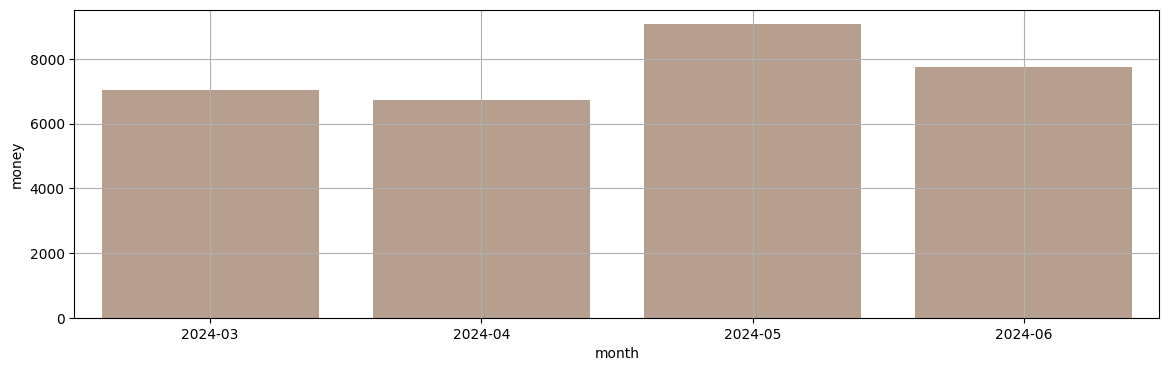

In [6]:
df_by_month = df.groupby("month").agg({"money":["sum","count"]}).reset_index()
df_by_month.columns = ["month","money","cups"]

plt.figure(figsize=(14,4))
sns.barplot(df_by_month, y="money", x="month", color="#bd9e8a")
plt.grid()

Money for each week

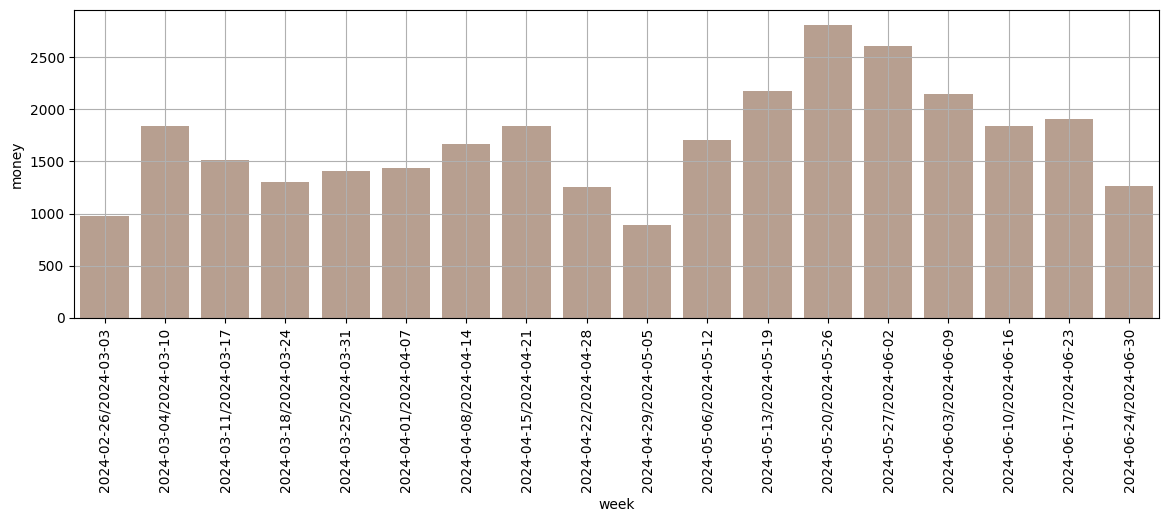

In [7]:
df_by_month = df.groupby("week").agg({"money": ["sum", "count"]}).reset_index()
df_by_month.columns = ["week", "money", "cups"]

plt.figure(figsize=(14, 4))
sns.barplot(df_by_month, y="money", x="week", color="#bd9e8a")
plt.xticks(rotation=90)
plt.grid()

# Credit:

https://www.kaggle.com/code/ihelon/coffee-sales-eda/notebook